In [1]:
import sys
sys.path.append('/w/jam-sciwork18/pitonyak/jam3d')
import os
os.environ["JAM3D"] = "/w/jam-sciwork18/pitonyak/jam3d"
import numpy as np
import pandas as pd
from tools.tools import load,save,checkdir,lprint
from qcdlib.core import CORE
from qcdlib.aux import AUX
from qcdlib.interpolator import INTERPOLATOR
from tools.config import conf
from ppdf0_WW import PPDF
import matplotlib.pyplot as plt
from scipy.integrate import quad, fixed_quad

conf['aux'] = AUX()

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-eytr9vrr because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
ppdf_files_NNPDF=[]
for i in range(1,101):
    if i < 10: ppdf_files_NNPDF.append('NNPDFpol11_100_000'+'%s'%i)
    elif i >=10 and i < 100: ppdf_files_NNPDF.append('NNPDFpol11_100_00'+'%s'%i)
    elif i >=100: ppdf_files_NNPDF.append('NNPDFpol11_100_0'+'%s'%i)
        
ppdf_files_JAM=[]
for i in range(1,201):
    if i < 10: ppdf_files_JAM.append('JAM17_PPDF_nlo_000'+'%s'%i)
    elif i >=10 and i < 100: ppdf_files_JAM.append('JAM17_PPDF_nlo_00'+'%s'%i)
    elif i >=100: ppdf_files_JAM.append('JAM17_PPDF_nlo_0'+'%s'%i)
        
ppdf_files_DSSV=[]
for i in range(1,201):
    if i < 10: ppdf_files_DSSV.append('DSSV_REP_LHAPDF6_000'+'%s'%i)
    elif i >=10 and i < 100: ppdf_files_DSSV.append('DSSV_REP_LHAPDF6_00'+'%s'%i)
    elif i >=100: ppdf_files_DSSV.append('DSSV_REP_LHAPDF6_0'+'%s'%i)

## Calculating g1T_WW

In [3]:
xarr=np.linspace(0.01,0.99,100)
Q2=4
g1Tu_WW_mean=[]
g1Tu_WW_std=[]
for x in xarr:
    g1Tu_WWarr=[]
    for f in ppdf_files_NNPDF:
        conf['ppdf']  = PPDF('p','/NNPDFpol11_100/%s'%f)
        g1Tu_WW = x*quad((lambda y: conf['ppdf'].get_C(y, Q2)[1]/y),x,1)[0]
        g1Tu_WWarr.append(g1Tu_WW)
    g1Tu_WW_mean.append(np.mean(g1Tu_WWarr))
    g1Tu_WW_std.append(np.std(g1Tu_WWarr))

g1Tu_WW_mean = np.array(g1Tu_WW_mean)
g1Tu_WW_std = np.array(g1Tu_WW_std)

save([g1Tu_WW_mean,g1Tu_WW_std],'g1TWW_data_NNPDF/g1Tu_WW_Q2_%d.dat'%int(Q2))

In [4]:
xarr=np.linspace(0.01,0.99,100)
Q2=4
g1Tu_WW_mean=[]
g1Tu_WW_std=[]
for x in xarr:
    g1Tu_WWarr=[]
    for f in ppdf_files_JAM:
        conf['ppdf']  = PPDF('p','/JAM17_PPDF_nlo/%s'%f)
        g1Tu_WW = x*quad((lambda y: conf['ppdf'].get_C(y, Q2)[1]/y),x,1)[0]
        g1Tu_WWarr.append(g1Tu_WW)
    g1Tu_WW_mean.append(np.mean(g1Tu_WWarr))
    g1Tu_WW_std.append(np.std(g1Tu_WWarr))

g1Tu_WW_mean = np.array(g1Tu_WW_mean)
g1Tu_WW_std = np.array(g1Tu_WW_std)

save([g1Tu_WW_mean,g1Tu_WW_std],'g1TWW_data_JAM/g1Tu_WW_Q2_%d.dat'%int(Q2))

In [20]:
xarr=np.linspace(0.01,0.99,100)
Q2=4
g1Tu_WW_mean=[]
g1Tu_WW_std=[]
for x in xarr:
    g1Tu_WWarr=[]
    for f in ppdf_files_DSSV:
        conf['ppdf']  = PPDF('p','/DSSV19_REP_LHAPDF6/%s'%f)
        g1Tu_WW = x*quad((lambda y: conf['ppdf'].get_C(y, Q2)[1]/y),x,1)[0]
        g1Tu_WWarr.append(g1Tu_WW)
    g1Tu_WW_mean.append(np.mean(g1Tu_WWarr))
    g1Tu_WW_std.append(np.std(g1Tu_WWarr))

g1Tu_WW_mean = np.array(g1Tu_WW_mean)
g1Tu_WW_std = np.array(g1Tu_WW_std)

save([g1Tu_WW_mean,g1Tu_WW_std],'g1TWW_data_DSSV/g1Tu_WW_Q2_%d.dat'%int(Q2))

IndexError: list index out of range

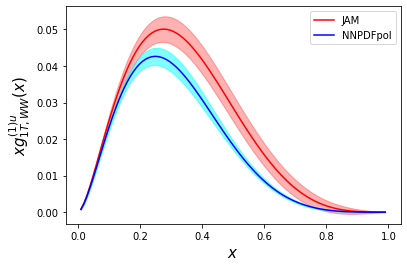

In [8]:
xarr=np.linspace(0.01,0.99,100)
Q2=4
g1Tu_WW_mean_NNPDF=load('g1TWW_data_NNPDF/g1Tu_WW_Q2_%d.dat'%Q2)[0]
g1Tu_WW_std_NNPDF=load('g1TWW_data_NNPDF/g1Tu_WW_Q2_%d.dat'%Q2)[1]
g1Tu_WW_mean_JAM=load('g1TWW_data_JAM/g1Tu_WW_Q2_%d.dat'%Q2)[0]
g1Tu_WW_std_JAM=load('g1TWW_data_JAM/g1Tu_WW_Q2_%d.dat'%Q2)[1]
#g1Tu_WW_mean_DSSV=load('g1TWW_data_DSSV/g1Tu_WW_Q2_%d.dat'%Q2)[0]
#g1Tu_WW_std_DSSV=load('g1TWW_data_DSSV/g1Tu_WW_Q2_%d.dat'%Q2)[1]

plt.figure()
plt.plot(xarr,xarr*g1Tu_WW_mean_JAM,color='r')
plt.plot(xarr,xarr*g1Tu_WW_mean_NNPDF,color='b')
#plt.plot(xarr,xarr*g1Tu_WW_mean_NNPDF,color='orange')
plt.ylabel(r'$xg_{1T,WW}^{(1)u}(x)$',size=15)
plt.xlabel(r'$x$',size=15)
plt.fill_between(xarr,xarr*(g1Tu_WW_mean_JAM+g1Tu_WW_std_JAM),xarr*(g1Tu_WW_mean_JAM-g1Tu_WW_std_JAM),color='r',alpha=0.3)
plt.fill_between(xarr,xarr*(g1Tu_WW_mean_NNPDF+g1Tu_WW_std_NNPDF),xarr*(g1Tu_WW_mean_NNPDF-g1Tu_WW_std_NNPDF),color='cyan',alpha=0.5)
#plt.fill_between(xarr,xarr*(g1Tu_WW_mean_DSSV+g1Tu_WW_std_DSSV),xarr*(g1Tu_WW_mean_DSSV-g1Tu_WW_std_DSSV),color='orange',alpha=0.5)
plt.legend(['JAM','NNPDFpol'])#,'DSSV'])
plt.show()

In [ ]:
xarr=np.linspace(0.01,0.99,100)
Q2=4
g1Td_WW_mean=[]
g1Td_WW_std=[]
for x in xarr:
    g1Td_WWarr=[]
    for f in ppdf_files_NNPDF:
        conf['ppdf']  = PPDF('p','/NNPDFpol11_100/%s'%f)
        g1Td_WW = x*quad((lambda y: conf['ppdf'].get_C(y, Q2)[3]/y),x,1)[0]
        g1Td_WWarr.append(g1Td_WW)
    g1Td_WW_mean.append(np.mean(g1Td_WWarr))
    g1Td_WW_std.append(np.std(g1Td_WWarr))

g1Td_WW_mean = np.array(g1Td_WW_mean)
g1Td_WW_std = np.array(g1Td_WW_std)

save([g1Td_WW_mean,g1Td_WW_std],'g1TWW_data_NNPDF/g1Td_WW_Q2_%d.dat'%int(Q2))

In [ ]:
xarr=np.linspace(0.01,0.99,100)
Q2=4
g1Td_WW_mean=[]
g1Td_WW_std=[]
for x in xarr:
    g1Td_WWarr=[]
    for f in ppdf_files_JAM:
        conf['ppdf']  = PPDF('p','/JAM17_PPDF_nlo/%s'%f)
        g1Td_WW = x*quad((lambda y: conf['ppdf'].get_C(y, Q2)[3]/y),x,1)[0]
        g1Td_WWarr.append(g1Td_WW)
    g1Td_WW_mean.append(np.mean(g1Td_WWarr))
    g1Td_WW_std.append(np.std(g1Td_WWarr))

g1Td_WW_mean = np.array(g1Td_WW_mean)
g1Td_WW_std = np.array(g1Td_WW_std)

save([g1Td_WW_mean,g1Td_WW_std],'g1TWW_data_JAM/g1Td_WW_Q2_%d.dat'%int(Q2))

In [ ]:
xarr=np.linspace(0.01,0.99,100)
Q2=4
g1Td_WW_mean=[]
g1Td_WW_std=[]
for x in xarr:
    g1Td_WWarr=[]
    for f in ppdf_files_DSSV:
        conf['ppdf']  = PPDF('p','/DSSV19_REP_LHAPDF6/%s'%f)
        g1Td_WW = x*quad((lambda y: conf['ppdf'].get_C(y, Q2)[3]/y),x,1)[0]
        g1Td_WWarr.append(g1Td_WW)
    g1Td_WW_mean.append(np.mean(g1Td_WWarr))
    g1Td_WW_std.append(np.std(g1Td_WWarr))

g1Td_WW_mean = np.array(g1Td_WW_mean)
g1Td_WW_std = np.array(g1Td_WW_std)

save([g1Td_WW_mean,g1Td_WW_std],'g1TWW_data_DSSV/g1Td_WW_Q2_%d.dat'%int(Q2))

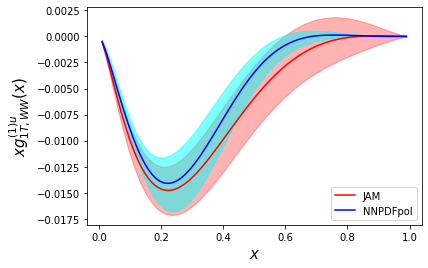

In [9]:
xarr=np.linspace(0.01,0.99,100)
Q2=4
g1Td_WW_mean_NNPDF=load('g1TWW_data_NNPDF/g1Td_WW_Q2_%d.dat'%Q2)[0]
g1Td_WW_std_NNPDF=load('g1TWW_data_NNPDF/g1Td_WW_Q2_%d.dat'%Q2)[1]
g1Td_WW_mean_JAM=load('g1TWW_data_JAM/g1Td_WW_Q2_%d.dat'%Q2)[0]
g1Td_WW_std_JAM=load('g1TWW_data_JAM/g1Td_WW_Q2_%d.dat'%Q2)[1]
#g1Td_WW_mean_DSSV=load('g1TWW_data_DSSV/g1Td_WW_Q2_%d.dat'%Q2)[0]
#g1Td_WW_std_DSSV=load('g1TWW_data_DSSV/g1Td_WW_Q2_%d.dat'%Q2)[1]

plt.figure()
plt.plot(xarr,xarr*g1Td_WW_mean_JAM,color='r')
plt.plot(xarr,xarr*g1Td_WW_mean_NNPDF,color='b')
#plt.plot(xarr,xarr*g1Td_WW_mean_DSSV,color='orange')
plt.ylabel(r'$xg_{1T,WW}^{(1)u}(x)$',size=15)
plt.xlabel(r'$x$',size=15)
plt.fill_between(xarr,xarr*(g1Td_WW_mean_JAM+g1Td_WW_std_JAM),xarr*(g1Td_WW_mean_JAM-g1Td_WW_std_JAM),color='r',alpha=0.3)
plt.fill_between(xarr,xarr*(g1Td_WW_mean_NNPDF+g1Td_WW_std_NNPDF),xarr*(g1Td_WW_mean_NNPDF-g1Td_WW_std_NNPDF),color='cyan',alpha=0.5)
#plt.fill_between(xarr,xarr*(g1Td_WW_mean_DSSV+g1Td_WW_std_DSSV),xarr*(g1Td_WW_mean_DSSV-g1Td_WW_std_DSSV),color='cyan',alpha=0.5)
plt.legend(['JAM','NNPDFpol'])#,'DSSV'])
plt.show()

In [ ]:
g1TuWW_arr=[]
for i in range(len(xarr)): g1TuWW_arr.append([xarr[i],g1Tu_WW_mean_NNPDF[i],g1Tu_WW_std_NNPDF[i]])
dfg1TuWW = pd.DataFrame(g1TuWW_arr,columns=['x','g1TWW_mean','g1TWW_std'])
writer = pd.ExcelWriter('g1TWW_data_NNPDF/g1TuWW_NNPDF.xlsx', engine='xlsxwriter')
dfg1TuWW.to_excel(writer,index=False)
writer.save()

In [ ]:
g1TdWW_arr=[]
for i in range(len(xarr)): g1TdWW_arr.append([xarr[i],g1Td_WW_mean_NNPDF[i],g1Td_WW_std_NNPDF[i]])
dfg1TdWW = pd.DataFrame(g1TdWW_arr,columns=['x','g1TWW_mean','g1TWW_std'])
writer = pd.ExcelWriter('g1TWW_data_NNPDF/g1TdWW_NNPDF.xlsx', engine='xlsxwriter')
dfg1TdWW.to_excel(writer,index=False)
writer.save()

In [ ]:
g1TuWW_arr=[]
for i in range(len(xarr)): g1TuWW_arr.append([xarr[i],g1Tu_WW_mean_JAM[i],g1Tu_WW_std_JAM[i]])
dfg1TuWW = pd.DataFrame(g1TuWW_arr,columns=['x','g1TWW_mean','g1TWW_std'])
writer = pd.ExcelWriter('g1TWW_data_JAM/g1TuWW_JAM.xlsx', engine='xlsxwriter')
dfg1TuWW.to_excel(writer,index=False)
writer.save()

In [ ]:
g1TdWW_arr=[]
for i in range(len(xarr)): g1TdWW_arr.append([xarr[i],g1Td_WW_mean_JAM[i],g1Td_WW_std_JAM[i]])
dfg1TdWW = pd.DataFrame(g1TdWW_arr,columns=['x','g1TWW_mean','g1TWW_std'])
writer = pd.ExcelWriter('g1TWW_data_JAM/g1TdWW_JAM.xlsx', engine='xlsxwriter')
dfg1TdWW.to_excel(writer,index=False)
writer.save()

In [ ]:
g1TuWW_arr=[]
for i in range(len(xarr)): g1TuWW_arr.append([xarr[i],g1Tu_WW_mean_DSSV[i],g1Tu_WW_std_DSSV[i]])
dfg1TuWW = pd.DataFrame(g1TuWW_arr,columns=['x','g1TWW_mean','g1TWW_std'])
writer = pd.ExcelWriter('g1TWW_data_DSSV/g1TuWW_DSSV.xlsx', engine='xlsxwriter')
dfg1TuWW.to_excel(writer,index=False)
writer.save()

In [ ]:
g1TdWW_arr=[]
for i in range(len(xarr)): g1TdWW_arr.append([xarr[i],g1Td_WW_mean_DSSV[i],g1Td_WW_std_DSSV[i]])
dfg1TdWW = pd.DataFrame(g1TdWW_arr,columns=['x','g1TWW_mean','g1TWW_std'])
writer = pd.ExcelWriter('g1TWW_data_DSSV/g1TdWW_DSSV.xlsx', engine='xlsxwriter')
dfg1TuWW.to_excel(writer,index=False)
writer.save()

## Calculating kx_TL to compare with lattice